In [1]:
import pandas as pd

data = pd.read_csv('bikeshare.csv')
X = data[[
    "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"
]]
y = data["riders"]

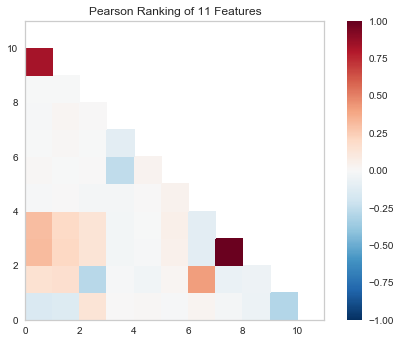

In [2]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()

In [3]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='temp', target='feelslike')
visualizer.fit(X['temp'], X['feelslike'])
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


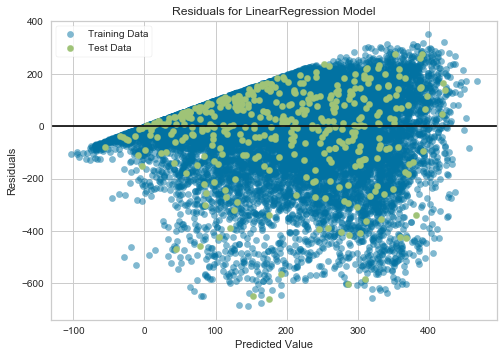

In [5]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=400
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

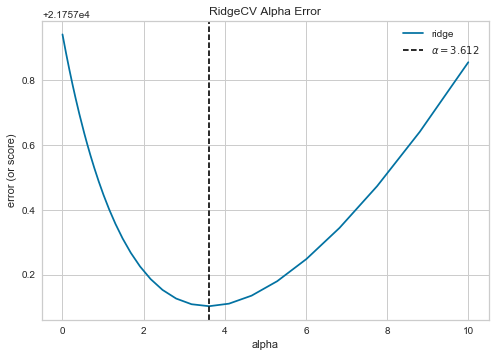

In [6]:
import numpy as np

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

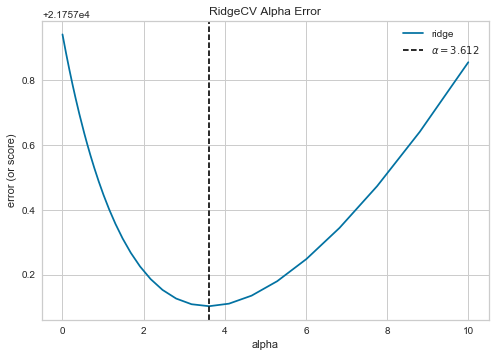

In [7]:
import numpy as np

from sklearn.linear_model import Lasso
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

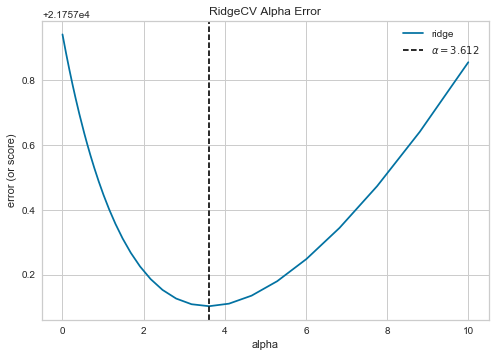

In [8]:
import numpy as np

from sklearn.linear_model import Ridge
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

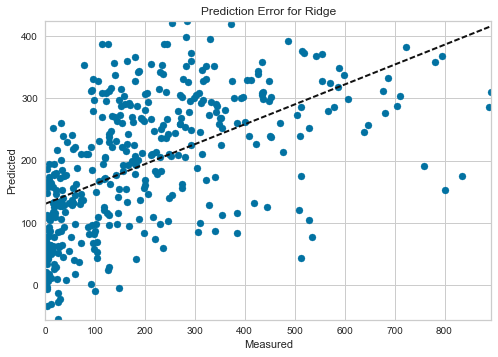

In [10]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.612))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [16]:
import os
import pandas as pd

names = [
    'class',
    'cap-shape',
    'cap-surface',
    'cap-color'
]

dataset   = pd.read_csv('mushroom.csv')
dataset.columns = names
dataset.head()

,class,cap-shape,cap-surface,cap-color
0,edible,convex,smooth,yellow
1,edible,bell,smooth,white
2,poisonous,convex,scaly,white
3,edible,convex,smooth,gray
4,edible,convex,scaly,yellow


In [17]:
features = ['cap-shape', 'cap-surface', 'cap-color']
target   = ['class']

X = dataset[features]
y = dataset[target]

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

In [19]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

In [20]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [21]:
model_selection(X, y, LinearSVC())

0.65838041431261773

In [22]:
model_selection(X, y, NuSVC())

0.67260164762157848

In [23]:
model_selection(X, y, SVC())

0.66242864556305137

In [24]:
model_selection(X, y, SGDClassifier())

0.70232402980095643

In [25]:
model_selection(X, y, KNeighborsClassifier())

0.65811850452152787

In [26]:
model_selection(X, y, LogisticRegressionCV())

0.65838041431261773

In [27]:
model_selection(X, y, LogisticRegression())

0.65804345096069328

In [28]:
model_selection(X, y, BaggingClassifier())

0.687643484132343

In [29]:
model_selection(X, y, ExtraTreesClassifier())

0.68713648045448383

In [30]:
model_selection(X, y, RandomForestClassifier())

0.68747466558573156

In [31]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['edible', 'poisonous'])
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.poof()

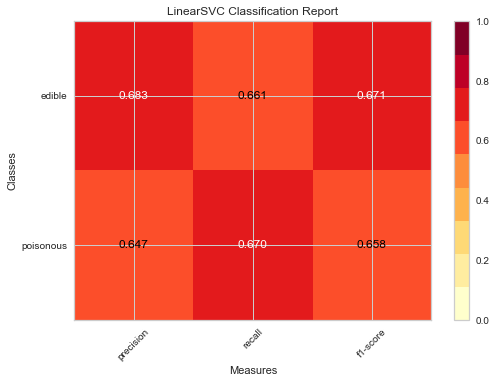

In [32]:
visual_model_selection(X, y, LinearSVC())

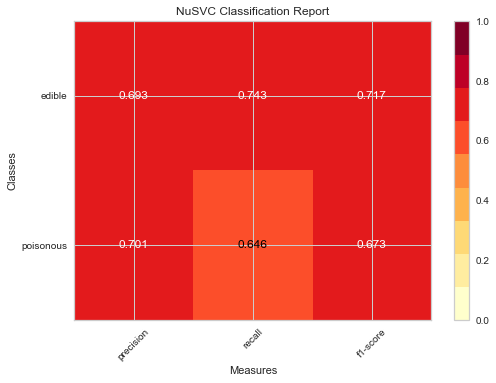

In [33]:
visual_model_selection(X, y, NuSVC())

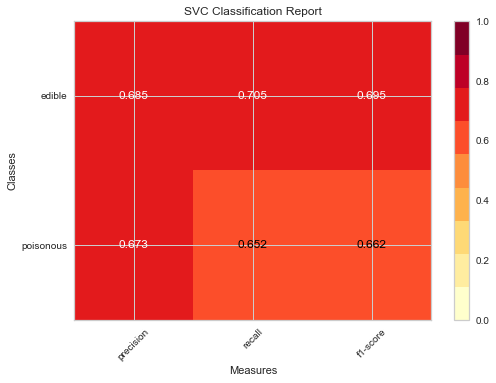

In [34]:
visual_model_selection(X, y, SVC())

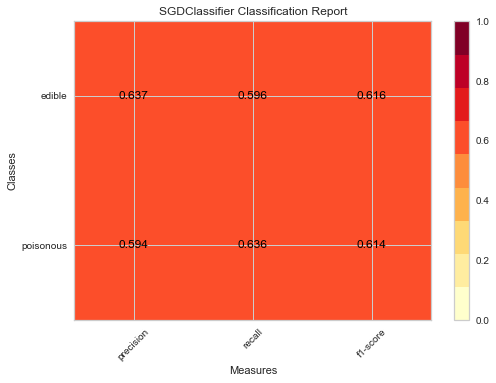

In [35]:
visual_model_selection(X, y, SGDClassifier())

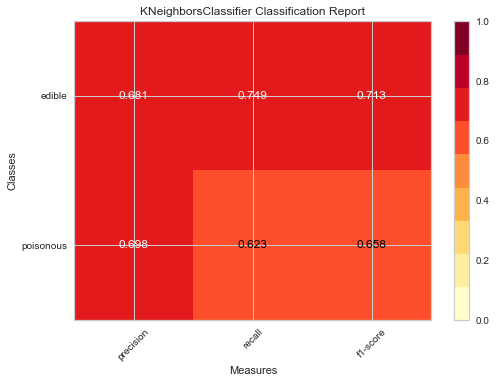

In [36]:
visual_model_selection(X, y, KNeighborsClassifier())

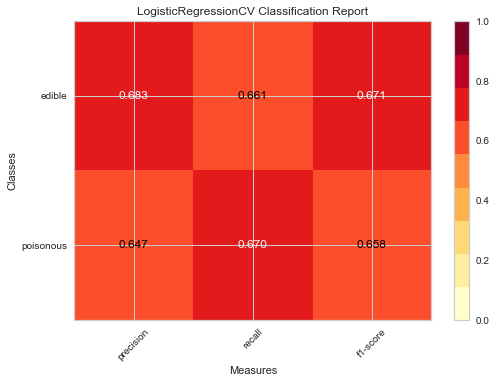

In [37]:
visual_model_selection(X, y, LogisticRegressionCV())

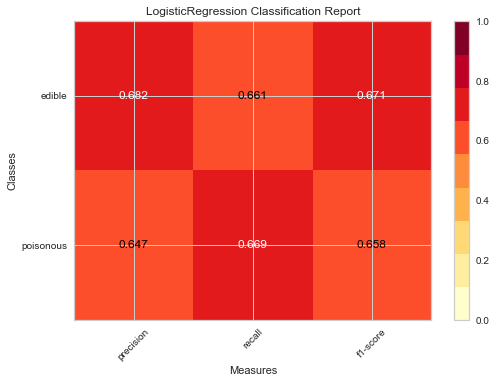

In [38]:
visual_model_selection(X, y, LogisticRegression())

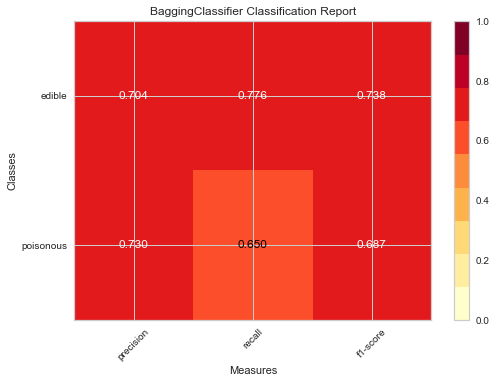

In [39]:
visual_model_selection(X, y, BaggingClassifier())

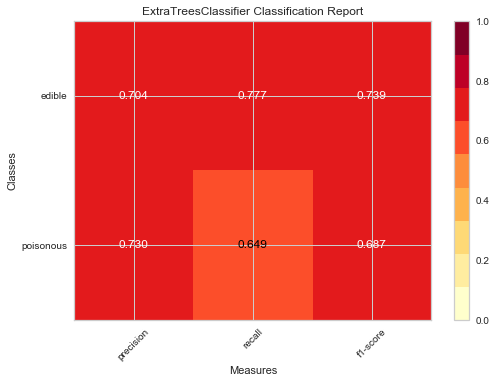

In [40]:
visual_model_selection(X, y, ExtraTreesClassifier())

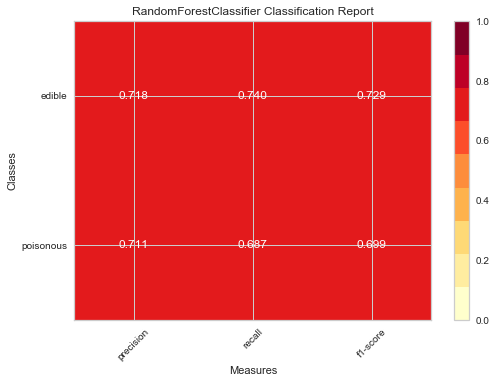

In [41]:
visual_model_selection(X, y, RandomForestClassifier())

/Users/adammorris/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


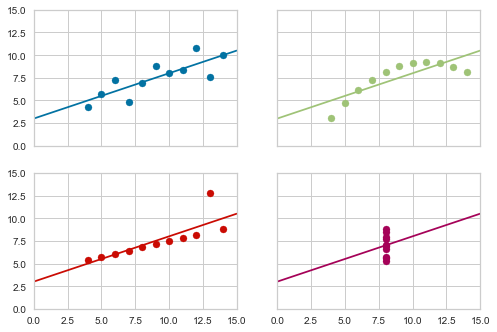

In [1]:
import yellowbrick as yb
import matplotlib.pyplot as plt

g = yb.anscombe()
plt.show()

In [8]:
from yellowbrick.features.rankd import *
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

In [9]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

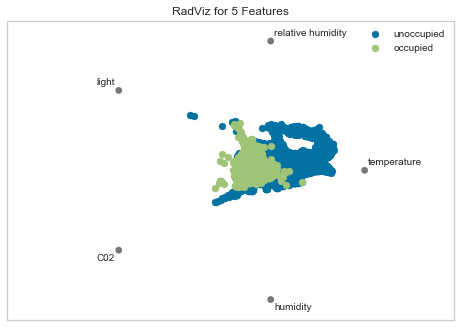

In [10]:
# Import the visualizer
from yellowbrick.features import RadViz

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

In [11]:
# Load the data set
data = pd.read_csv('credit.csv')

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

In [14]:
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = RankD(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

NameError: name 'RankD' is not defined

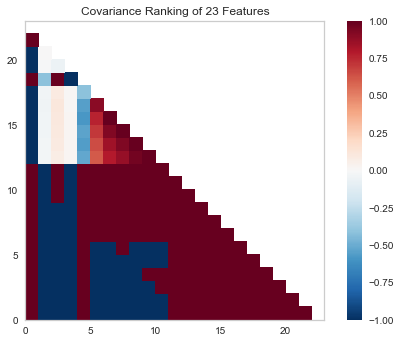

In [15]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

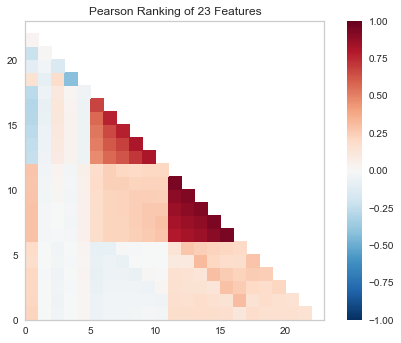

In [16]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [17]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

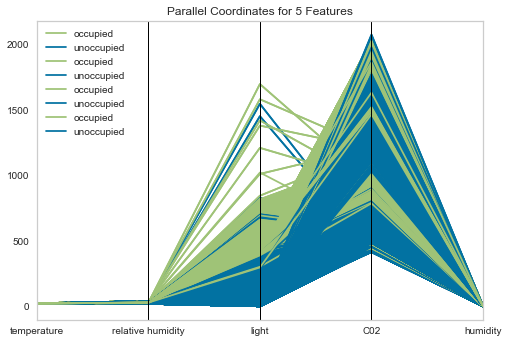

In [21]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=features, normalize='standard', sample = 0.1)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

In [24]:
# Load the classification data set
data = pd.read_csv('credit.csv')

# Specify the features of interest
features = [
    'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay',
]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


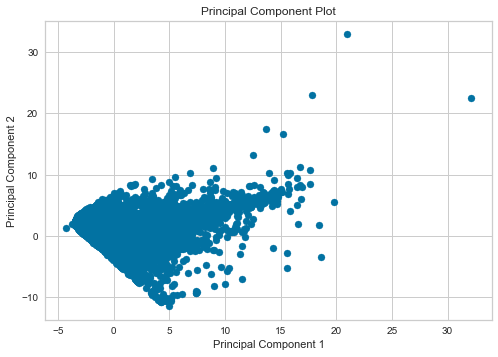

In [25]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


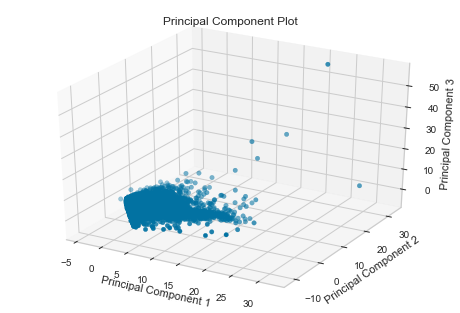

In [26]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

In [28]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features]
y = data.occupancy

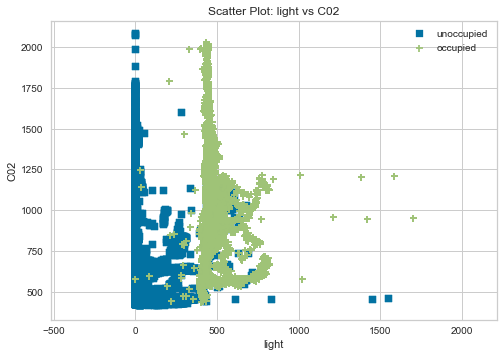

In [29]:
from yellowbrick.features import ScatterVisualizer

visualizer = ScatterVisualizer(x='light', y='C02', classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [30]:
# Load the data
df = pd.read_csv('concrete.csv')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame
X = df[feature]
y = df[target]

In [32]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

In [33]:
visualizer = JointPlotVisualizer(
    feature=feature, target=target, joint_plot='hex'
)

visualizer.fit(X, y)
visualizer.poof()

In [35]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features]
y = data.occupancy

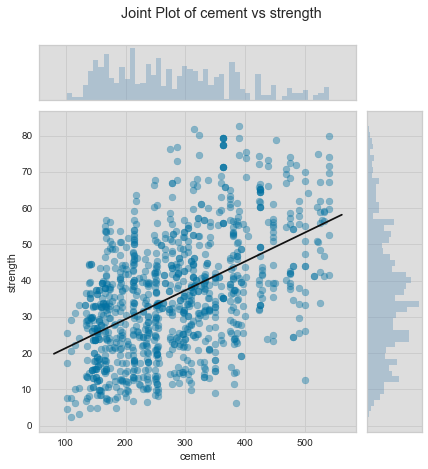

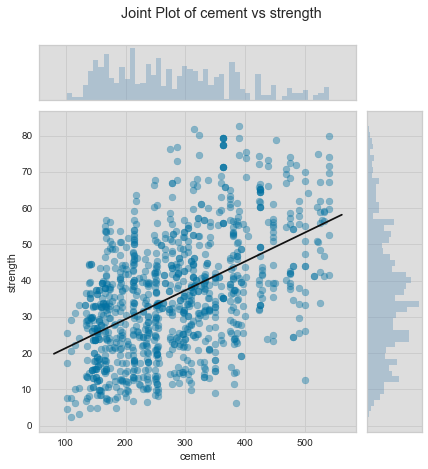

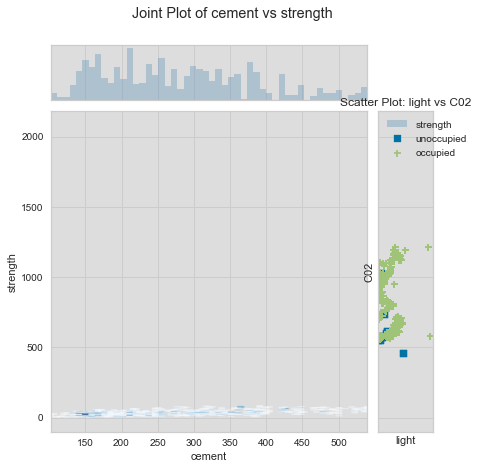

In [36]:
from yellowbrick.features import ScatterVisualizer

visualizer = ScatterVisualizer(x='light', y='C02', classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [37]:
# Load the data
df = pd.read_csv('concrete.csv')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame
X = df[feature]
y = df[target]

In [38]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

In [39]:
visualizer = JointPlotVisualizer(
    feature=feature, target=target, joint_plot='hex'
)

visualizer.fit(X, y)
visualizer.poof()

In [40]:
# Regression Evaluation Imports

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

In [42]:
# Load the data
df = pd.read_csv('concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

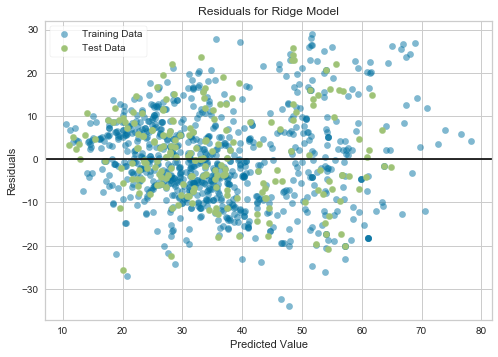

In [44]:
# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [48]:
# Load the data
df = pd.read_csv('concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

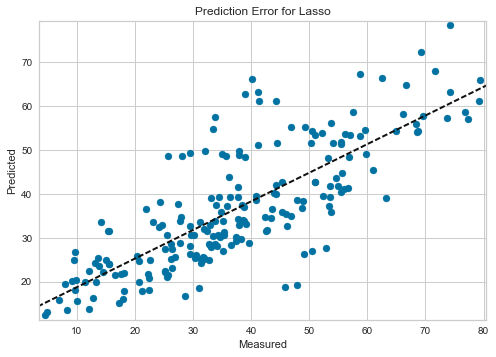

In [50]:
# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

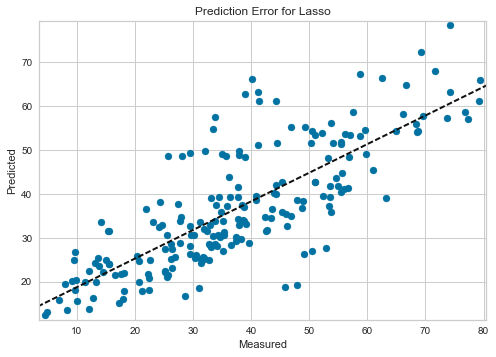

In [51]:
>>> from yellowbrick.regressor import PredictionError
>>> from sklearn.linear_model import Lasso
>>> model = PredictionError(Lasso())
>>> model.fit(X_train, y_train)
>>> model.score(X_test, y_test)
>>> model.poof()

In [54]:
# Load the data
df = pd.read_csv('concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1]:
import numpy
# Create a list of alphas to cross-validate against
alphas = np.logspace(-12, -0.5, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

NameError: name 'np' is not defined